mean (μ): 167.39698465643764
variance (μ²): 21.074876510104783


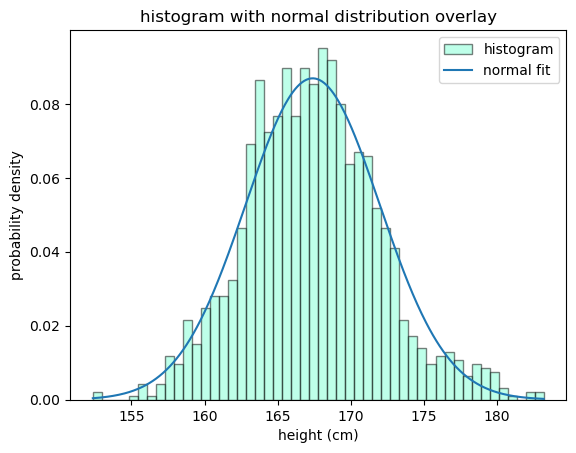

p(x > 182.88): 0.00037222423379180286


In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math

# load the dataset 
data = pd.read_csv("height_dataset.csv")

# extract the height values
heights = data["value"]

# compute mean and variance
mu = np.mean(heights)
sigma2 = np.var(heights)

print("mean (\u03bc):", mu)
print("variance (\u03bc\u00b2):", sigma2)

# define the normal density function
def f(x):
    # we use math.sqrt and math.exp for the formula
    return (1 / math.sqrt(2 * math.pi * sigma2)) * math.exp(-(x - mu)**2 / (2 * sigma2))

# create x values for smooth curve
x_vals = np.linspace(min(heights), max(heights), 400)
y_vals = [f(x) for x in x_vals]

# plot histogram and curve on the same graph
plt.hist(heights, bins=50, density=True, edgecolor="black", color="aquamarine", alpha=0.5, label="histogram")
plt.plot(x_vals, y_vals, label="normal fit")

plt.xlabel("height (cm)")
plt.ylabel("probability density")
plt.title("histogram with normal distribution overlay")
plt.legend()
plt.show()

# numerical integration to compute p(x > 182.88)
probability, error = quad(f, 182.88, np.inf)
print("p(x > 182.88):", probability)

In [7]:
# importing required libraries
import numpy as np
import pandas as pd
from scipy.integrate import quad

# assigning mean and standard deviation from previous calculations
mu = mu
sigma = np.sqrt(sigma2)

# defining the dosage function
def d(x):
    return 2.38 * (x**2)

# defining the normal density function
def f(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# integrating d(x) * f(x) over the specified range
avg_dosage, error = quad(lambda x: d(x) * f(x, mu, sigma), 50, 300)

# printing the result formatted to two decimal places
print(f"The estimated average dosage is approximately: {avg_dosage:.2f}")

The estimated average dosage is approximately: 66741.92
